<a href="https://colab.research.google.com/github/Mikhail-068/Android_Lesson_4_homework_PRO/blob/master/%D0%9F%D0%B0%D1%81%D1%81%D0%B0%D0%B6%D0%B8%D1%80%D1%8B_%D0%B0%D0%B2%D1%82%D0%BE%D0%B1%D1%83%D1%81%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip


---
Дополнительная информация ([База знаний УИИ - «**Загрузка изображений**»](https://colab.research.google.com/drive/1T3i7JL1jYDPZlFT5UwC91cxUL0smehZz?usp=sharing))

---





In [ ]:
# Импортируем библиотеки

# Библиотека работы с массивами
import numpy as np

# Последовательная модель НС
from tensorflow.keras.models import Sequential, load_model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# метод из библиотеки keras
from tensorflow.keras.preprocessing import image
# Рисование графиков
import matplotlib.pyplot as plt
import gdown, os, random

In [ ]:
# Скачаем базу
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip', None, quiet = True)
!unzip -qo "bus.zip" -d /content/bus
!rm -r sample_data bus.zip

'bus.zip'

Посмотрим на случайные примеры изображений каждого класса:

Входящий:


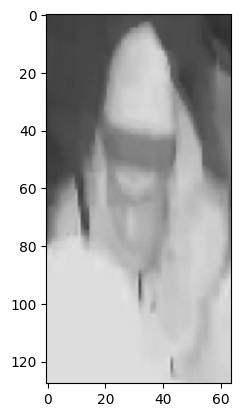

Выходящий:


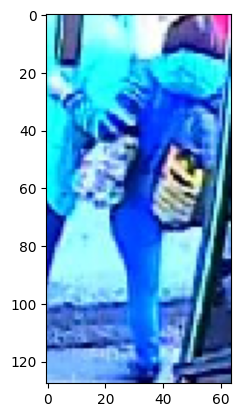

In [ ]:
print('Входящий:')
im_en = random.choice(os.listdir('/content/bus/Входящий'))
tmp = image.load_img('/content/bus/Входящий/' + im_en, target_size=(128, 64))
plt.imshow(tmp)
plt.show()

print('Выходящий:')
im_en = random.choice(os.listdir('/content/bus/Выходящий'))
tmp = image.load_img('/content/bus/Выходящий/' + im_en, target_size=(128, 64))
plt.imshow(tmp)
plt.show()

In [ ]:
x_data = []
y_data = []

for f in os.listdir('/content/bus/Входящий'):
  im = np.array(image.load_img('/content/bus/Входящий/' + f, target_size=(128, 64)))
  x_data.append(im)
  y_data.append(0)

In [ ]:
for f in os.listdir('/content/bus/Выходящий'):
  im = np.array(image.load_img('/content/bus/Выходящий/' + f, target_size=(128, 64)))
  x_data.append(im)
  y_data.append(1)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(9081, 128, 64, 3)
(9081,)


In [ ]:
x_data_reshape = x_data.reshape(x_data.shape[0], -1) / 255
print(x_data_reshape.shape)

(9081, 24576)


Нам осталось разделить полученные наборы данных на обучающую и тестовую выборки:

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data_reshape,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)

print('Размеры сформированных массивов:')

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

Размеры сформированных массивов:
(7264, 24576)
(1817, 24576)
(7264,)
(1817,)


Выборки подготовлены. Сформируем и обучим нейронную сеть для решения поставленной задачи:

In [ ]:
x_train[0][None, ...].shape


(1, 24576)

In [ ]:
model = Sequential() # Последовательная модель нейронной сети

model.add(Dense(2048, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              50333696  
                                                                 
 dense_1 (Dense)             (None, 800)               1639200   
                                                                 
 dense_2 (Dense)             (None, 1)                 801       
                                                                 
Total params: 51,973,697
Trainable params: 51,973,697
Non-trainable params: 0
_________________________________________________________________


Обратите внимание на последний слой модели:

    model.add(Dense(1, activation='sigmoid'))

У нас два класса: входящий и выходящий пассажир, но мы используем Dense-слой с одним нейроном.

Текущая задача - пример так называемой бинарной классификации (классификация на два класса). В таких задачах корректнее будет создавать выходной слой с одним нейроном и функцией активации **sigmoid** (в отличии от задач многоклассовой классификации, где мы используем функцию активации **softmax**)

Epoch 1/20
57/57 [==============================] - 8s 36ms/step - loss: 0.8284 - accuracy: 0.6739 - val_loss: 0.5260 - val_accuracy: 0.7446
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 0.5064 - accuracy: 0.7627 - val_loss: 0.4908 - val_accuracy: 0.7711
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 0.4533 - accuracy: 0.7985 - val_loss: 0.4303 - val_accuracy: 0.8063
Epoch 4/20
57/57 [==============================] - 1s 26ms/step - loss: 0.4318 - accuracy: 0.8111 - val_loss: 0.4073 - val_accuracy: 0.8222
Epoch 5/20
57/57 [==============================] - 2s 27ms/step - loss: 0.4138 - accuracy: 0.8179 - val_loss: 0.3811 - val_accuracy: 0.8365
Epoch 6/20
57/57 [==============================] - 2s 27ms/step - loss: 0.3603 - accuracy: 0.8476 - val_loss: 0.4003 - val_accuracy: 0.8217
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.3381 - accuracy: 0.8553 - val_loss: 0.3252 - val_accuracy: 0.8569
Epoch 8/20
57

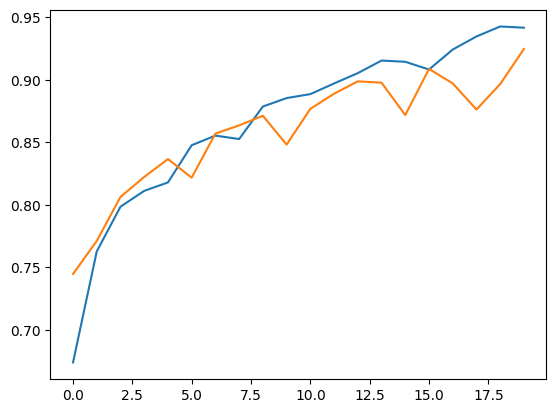

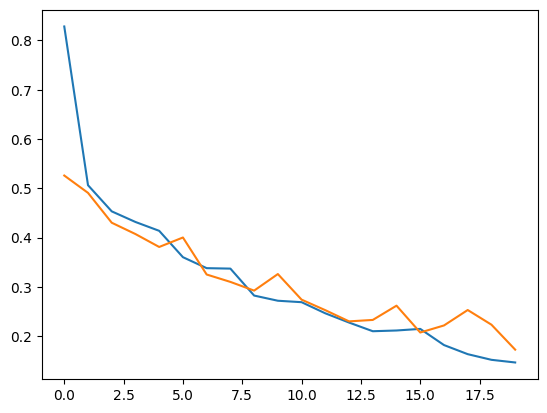

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='binary_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 20,
                    batch_size = 128)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Epoch 1/20
57/57 [==============================] - 3s 38ms/step - loss: 0.2942 - accuracy: 0.9061 - val_loss: 0.1821 - val_accuracy: 0.9285
Epoch 2/20
57/57 [==============================] - 2s 28ms/step - loss: 0.1357 - accuracy: 0.9535 - val_loss: 0.1788 - val_accuracy: 0.9180
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 0.1283 - accuracy: 0.9507 - val_loss: 0.1822 - val_accuracy: 0.9252
Epoch 4/20
57/57 [==============================] - 2s 27ms/step - loss: 0.1255 - accuracy: 0.9513 - val_loss: 0.1761 - val_accuracy: 0.9285
Epoch 5/20
57/57 [==============================] - 1s 24ms/step - loss: 0.1112 - accuracy: 0.9588 - val_loss: 0.1886 - val_accuracy: 0.9191
Epoch 6/20
57/57 [==============================] - 2s 27ms/step - loss: 0.1211 - accuracy: 0.9513 - val_loss: 0.1867 - val_accuracy: 0.9125
Epoch 7/20
57/57 [==============================] - 1s 25ms/step - loss: 0.1029 - accuracy: 0.9621 - val_loss: 0.1499 - val_accuracy: 0.9406
Epoch 8/20
57

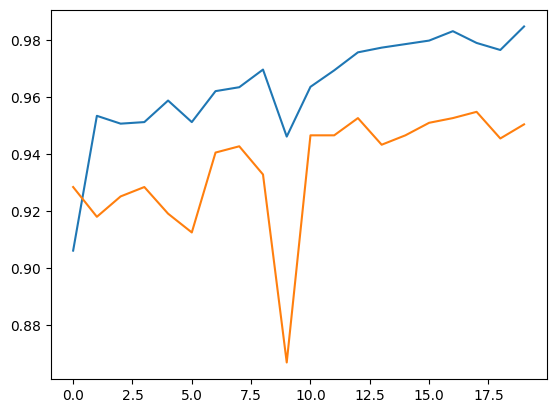

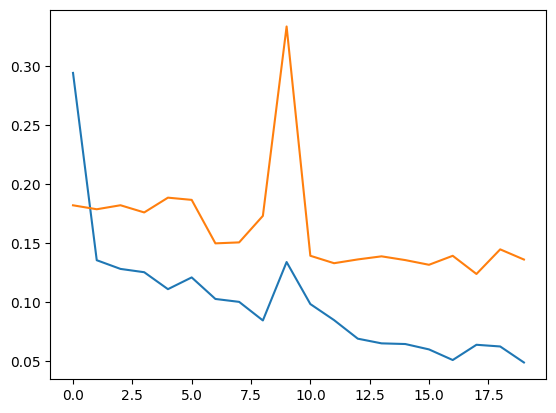

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='binary_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 20,
                    batch_size = 128)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Epoch 1/20
57/57 [==============================] - 4s 40ms/step - loss: 0.0373 - accuracy: 0.9901 - val_loss: 0.1083 - val_accuracy: 0.9637
Epoch 2/20
57/57 [==============================] - 2s 27ms/step - loss: 0.0302 - accuracy: 0.9924 - val_loss: 0.1032 - val_accuracy: 0.9675
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.1081 - val_accuracy: 0.9659
Epoch 4/20
57/57 [==============================] - 2s 27ms/step - loss: 0.0278 - accuracy: 0.9931 - val_loss: 0.1043 - val_accuracy: 0.9653
Epoch 5/20
57/57 [==============================] - 1s 25ms/step - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.1000 - val_accuracy: 0.9675
Epoch 6/20
57/57 [==============================] - 1s 25ms/step - loss: 0.0289 - accuracy: 0.9935 - val_loss: 0.1081 - val_accuracy: 0.9653
Epoch 7/20
57/57 [==============================] - 2s 27ms/step - loss: 0.0263 - accuracy: 0.9931 - val_loss: 0.1015 - val_accuracy: 0.9681
Epoch 8/20
57

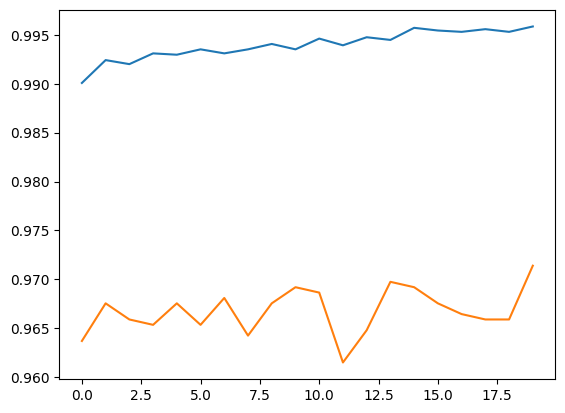

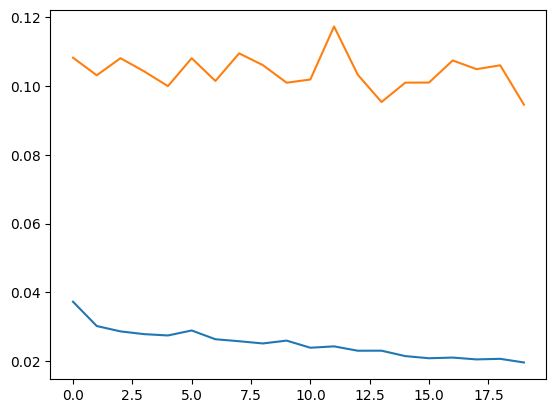

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'],
              loss='binary_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 20,
                    batch_size = 128)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/Android/Лекция 3/model_bus.keras')
model = load_model('/content/drive/MyDrive/Colab Notebooks/Android/Лекция 3/model_bus.keras')

Задача решена. Мы добились точности распознавания распозанавния на проверочной выборке 97.14%!

In [ ]:
example = x_val[0][None, ...]
example.shape

(1, 24576)

In [ ]:
round(model.evaluate(x_val, y_val, verbose=0)[1], 4)

0.9917

In [ ]:
model.predict(example)

1/1 [==============================] - 0s 118ms/step


array([[0.9374372]], dtype=float32)

In [ ]:
# @title show_size
def show_size(model_1, model_2):
  # Сохраняем файлы
  model_1.save("model.keras")
  open("model.tflite", "wb").write(model_2)

  # Получаем размер в байтах
  keras_size = os.path.getsize("model.keras")
  tflite_size = os.path.getsize("model.tflite")

  #Конвертируем в мегабайты
  keras_size = round(keras_size/ 1e6, 1)
  tflite_size = round(tflite_size/ 1e6, 1)

  print(f"Keras: {keras_size} MB" )
  print(f"tfLITE: {tflite_size} MB")

In [ ]:
import tensorflow as tf

In [ ]:
# Создаем конвертер на основе модели Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Включаем оптимизации модели по умолчанию
# Это сделает модель более компактной и эффективной
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Конвертируем модель в формат TensorFlow Lite
tflite_model = converter.convert()

show_size(model, tflite_model)

Keras: 623.7 MB
tfLITE: 52.0 MB
